## Exemplo prático

In [1]:
import pandas as pd

In [2]:
# Criando as listas x e y
data = [
    [1.65, 'M'],
    [1.50, 'B'],
    [1.70, 'M'],
    [1.92, 'A'],
    [1.54, 'B'],
    [1.60, 'M'],
    [1.71, 'A'],
    [1.55, 'B'],
    [1.67, 'M'],
    [1.81, 'A'],
]

In [3]:
# Criando um DataFrame com os dados gerados e colunas x e y
df = pd.DataFrame(data, columns=['x', 'y'])

In [4]:
df.shape

(10, 2)

In [5]:
df.head()

,x,y
0,1.65,M
1,1.50,B
2,1.70,M
3,1.92,A
4,1.54,B


### Usando um algoritmo explícito

In [6]:
# Definindo uma classe para representar o modelo
class Model():
    def predict(self, x):
        if x < 1.6:
            y = 'B'
        elif x <= 1.7:
            y = 'M'
        else:
            y = 'A'
        return y

In [7]:
# Instanciando um modelo
model1 = Model()

# Realizando a predição
newX = 1.68
m1YPred = model1.predict(newX)
print('Valor predito:', m1YPred)

Valor predito: M


### Usando um algoritmo de árvore de decisão

In [8]:
# Importando a lib para treinar um modelo baseado em árvores de decisão
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Separando os dados de entrada (atributos preditivos) e saída (atributo alvo/target)
X_train = df['x'].values.reshape(-1, 1)
y_train = df['y']

In [10]:
# Criando um modelo de classificação - DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# Treinando o modelo
model2 = model2.fit(X_train, y_train)

In [11]:
# Realizando a predição
newX = [[1.68]]
m2YPred = model2.predict(newX)
m2YPred
print('Valor predito:', m2YPred[0])

Valor predito: M


In [12]:
# Visualizando a árvore de decisão
#!conda install graphviz

import os
import io
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data

In [13]:
feature_cols = df.drop('y', axis=1).columns
class_label = model2.classes_

In [14]:
feature_cols

Index(['x'], dtype='object')

In [15]:
class_label

array(['A', 'B', 'M'], dtype=object)

In [16]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=class_label)

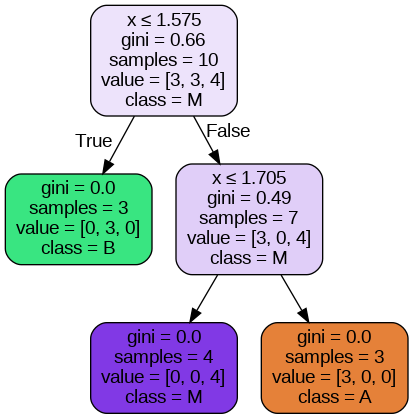

In [17]:
(graph, ) = graph_from_dot_data(dot_data.getvalue())

graph.write_png('tree.png')
Image('tree.png')